In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.graphics.factorplots import interaction_plot

from scipy import stats

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/8086/states.csv')

In [3]:
df

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6
5,Colorado,84.5,90.2,88.7,9.4,9.6
6,Connecticut,87.7,85.4,87.5,7.8,12.1
7,Delaware,80.1,76.3,88.7,8.1,13.1
8,District of Columbia,100.0,36.2,86.0,16.8,18.9
9,Florida,89.3,80.6,84.7,12.1,12.0


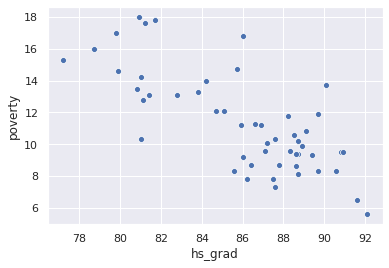

In [4]:
sns.scatterplot(x='hs_grad', y='poverty', data=df)

In [5]:
print(df.poverty.describe())

count    51.000000
mean     11.349020
std       3.099185
min       5.600000
25%       9.250000
50%      10.600000
75%      13.400000
max      18.000000
Name: poverty, dtype: float64


In [6]:
print(df.hs_grad.describe())

count    51.000000
mean     86.011765
std       3.725998
min      77.200000
25%      83.300000
50%      86.900000
75%      88.700000
max      92.100000
Name: hs_grad, dtype: float64


In [7]:
# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
result = stats.linregress(df.hs_grad, df.poverty)
print(f"intercept:\t{result.intercept}\n\
slope:\t\t{result.slope}\n\
rvalue:\t\t{result.rvalue}\n\
pvalue:\t\t{result.pvalue}\n\
stderr:\t\t{result.stderr}\n")

intercept:	64.78096577010209
slope:		-0.6212167177940106
rvalue:		-0.7468582531582505
pvalue:		3.10882981031841e-10
stderr:		0.0790164710017928



In [8]:
X = np.array(df.hs_grad).reshape(-1, 1)
y = df.poverty.values

In [9]:
model = LinearRegression()

In [10]:
reg = model.fit(X, y)

In [11]:
reg.score(X, y)

0.5577972503105937

In [12]:
print(f"Intercept:\t{reg.intercept_}\nSlope:\t\t{reg.coef_}")

Intercept:	64.7809657701021
Slope:		[-0.62121672]


In [13]:
N = len(X)
p = len(X[0]) + 1 
print(f"N: {N}\np: {p}")

X_with_intercept = pd.DataFrame(df[df.columns[3]])
X_with_intercept[1] = X_with_intercept
X_with_intercept[X_with_intercept.columns[0]] = 1
X_with_intercept = X_with_intercept.values

N: 51
p: 2


In [14]:
X_with_intercept

array([[ 1. , 79.9],
       [ 1. , 90.6],
       [ 1. , 83.8],
       [ 1. , 80.9],
       [ 1. , 81.1],
       [ 1. , 88.7],
       [ 1. , 87.5],
       [ 1. , 88.7],
       [ 1. , 86. ],
       [ 1. , 84.7],
       [ 1. , 85.1],
       [ 1. , 88.5],
       [ 1. , 88.2],
       [ 1. , 85.9],
       [ 1. , 86.4],
       [ 1. , 89.7],
       [ 1. , 88.6],
       [ 1. , 82.8],
       [ 1. , 79.8],
       [ 1. , 86.6],
       [ 1. , 87.6],
       [ 1. , 87.1],
       [ 1. , 87.6],
       [ 1. , 91.6],
       [ 1. , 81.2],
       [ 1. , 88.3],
       [ 1. , 90.1],
       [ 1. , 90.8],
       [ 1. , 85.6],
       [ 1. , 92.1],
       [ 1. , 86.2],
       [ 1. , 81.7],
       [ 1. , 84.2],
       [ 1. , 81.4],
       [ 1. , 89.7],
       [ 1. , 87.2],
       [ 1. , 85.7],
       [ 1. , 86.9],
       [ 1. , 86. ],
       [ 1. , 81. ],
       [ 1. , 80.8],
       [ 1. , 88.7],
       [ 1. , 81. ],
       [ 1. , 77.2],
       [ 1. , 89.4],
       [ 1. , 88.9],
       [ 1. , 87.8],
       [ 1. ,

In [15]:
ols = sm.OLS(y, X_with_intercept)
ols_result = ols.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.11e-10
Time:                        18:37:21   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.7810      6.803      9.523      0.0

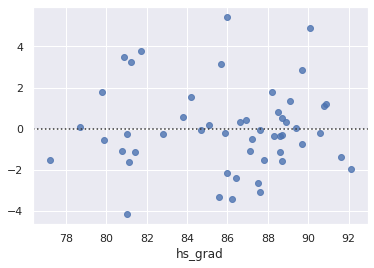

In [16]:
sns.residplot(df.hs_grad, y)

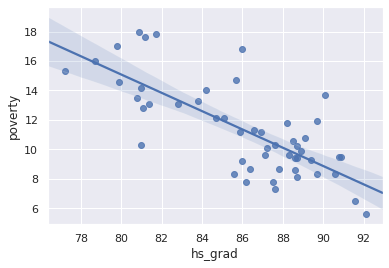

In [17]:
sns.regplot(x='hs_grad', y='poverty', data=df)

In [18]:
predicted = ols_result.predict(X_with_intercept)
predicted

array([15.14575002,  8.49873114, 12.72300482, 14.5245333 , 14.40028996,
        9.6790429 , 10.42450296,  9.6790429 , 11.35632804, 12.16390977,
       11.91542309,  9.80328625,  9.98965126, 11.41844971, 11.10784135,
        9.05782618,  9.74116457, 13.34422154, 15.20787169, 10.98359801,
       10.36238129, 10.67298965, 10.36238129,  7.87751442, 14.33816829,
        9.92752959,  8.8093395 ,  8.37448779, 11.60481473,  7.56690606,
       11.2320847 , 14.02755993, 12.47451813, 14.21392494,  9.05782618,
       10.61086798, 11.54269306, 10.79723299, 11.35632804, 14.46241163,
       14.58665497,  9.6790429 , 14.46241163, 16.82303516,  9.2441912 ,
        9.55479956, 10.23813795,  9.43055621, 15.89121008,  9.74116457,
        8.31236612])

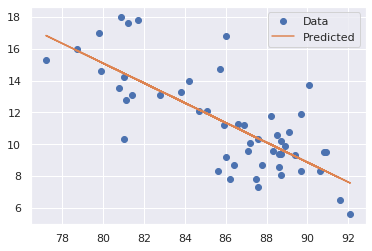

In [19]:
fig, ax = plt.subplots()
ax.plot(df.hs_grad, df.poverty, 'o', label="Data")
ax.plot(df.hs_grad, predicted, label="Predicted")
ax.legend(loc="best");

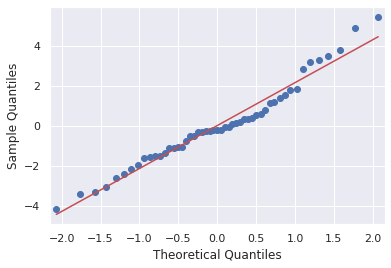

In [20]:
diff = df.poverty-predicted
fig = sm.qqplot(diff, line='r',)

In [21]:
df

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6
5,Colorado,84.5,90.2,88.7,9.4,9.6
6,Connecticut,87.7,85.4,87.5,7.8,12.1
7,Delaware,80.1,76.3,88.7,8.1,13.1
8,District of Columbia,100.0,36.2,86.0,16.8,18.9
9,Florida,89.3,80.6,84.7,12.1,12.0


In [22]:
df.columns

Index(['state', 'metro_res', 'white', 'hs_grad', 'poverty', 'female_house'], dtype='object')

In [35]:
X = df[['metro_res', 'white', 'hs_grad', 'female_house']]
X = sm.add_constant(X)

In [36]:
Y = df['poverty']

In [37]:
ols = sm.OLS(Y, X)
ols_result = ols.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           8.88e-10
Time:                        11:35:51   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           66.4765     12.590      5.280   

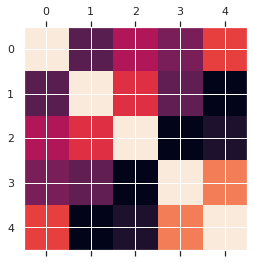

In [41]:
plt.matshow(df.corr())